In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=[]

with open("./train.txt","r") as file:
    for line in file:
        metadata,tweet=line[1:13],line[14:]
        ID,label,company = metadata.split(",")
        data.append((ID,label,company,tweet))

df=pd.DataFrame(data,columns=["id","label","company","tweet"])
df.head(10)

,id,label,company,tweet
0,0000,neu,apl,20 min line @apple store @short pump.\n
1,0001,irr,msf,Nueva tecnología convierte cualquier superfic...
2,0002,neu,ggl,Some people should not post replies in #Googl...
3,0003,neg,apl,I know a few others having same issue RT @Joe...
4,0004,neg,msf,"#Microsoft - We put the """"backwards"""" into ba..."
5,0005,neg,twt,#twitter is sooo trash ritenow with all dezz ...
6,0006,neu,apl,RT @jesperordrup: Hi @apple. Household has 4 ...
7,0007,irr,msf,#ALG Culminando formación en #Microsoft M-277...
8,0008,neu,msf,#Microsoft Community Blogs The 7/365 Review -...
9,0009,irr,twt,Buenas noches a todos #Twitter off\n


In [4]:
df.to_csv(r'./train.csv', index = False)

In [5]:
print(df.groupby('label')['label'].count())

label
irr    1389
neg     486
neu    1871
pos     427
Name: label, dtype: int64


In [6]:
df['length']=df['tweet'].apply(lambda x:len(x))
len_df = df.groupby('length').count()
sent_length = len_df.index.tolist()
sent_freq = len_df['label'].tolist()

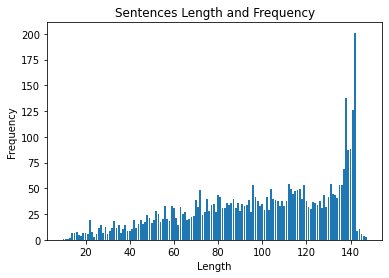

In [7]:
plt.bar(sent_length, sent_freq)
plt.title("Sentences Length and Frequency")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

In [8]:
from keras.utils import np_utils, plot_model
from keras.preprocessing.sequence import pad_sequences

In [9]:
labels, vocabulary = list(df['label'].unique()), list(df['tweet'].unique())
string = ''
for word in vocabulary:
    string += word

vocabulary = set(string)
word_dictionary = {word: i+1 for i, word in enumerate(vocabulary)}
label_dictionary = {label: i for i, label in enumerate(labels)}
vocab_size = len(word_dictionary.keys())
label_size = len(label_dictionary.keys())

In [11]:
x = [[word_dictionary[word] for word in sent] for sent in df['tweet']]
x = pad_sequences(maxlen=100, sequences=x, padding='post', value=0)
y = [[label_dictionary[sent]] for sent in df['label']]
y = [np_utils.to_categorical(label, num_classes=label_size) for label in y]
y = np.array([list(_[0]) for _ in y])

In [14]:
print("X:{}\nY:{}".format(x,y))

X:[[606 167  76 ...   0   0   0]
 [ 39 373 366 ... 651 634 345]
 [634 395 475 ...  31 455 345]
 ...
 [634  31 606 ... 656 328 345]
 [373 395  68 ... 682 366 345]
 [366 348 328 ... 235 467 345]]
Y:[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
